In [2]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

In [3]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

>Author: Frank E. Harrell Jr., Thomas Cason  Source: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)   
<br/><br/>

>The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.  
<br/><br/>
>Thomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variables created.   For more information about how this dataset was constructed: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt   

### Attribute information
The variables on our extracted dataset are pclass, survived, name, age, embarked, home.dest, room, ticket, boat, and sex. 


- survival: Survival (0 = No, 1 = Yes)
- pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex:	Sex	
- Age:	Age in years	
- sibsp:	# of siblings / spouses aboard the Titanic	
- parch:	# of parents / children aboard the Titanic	
- ticket:	Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked:	Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

# Explore the data

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


In [5]:
X.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
X.head(2).T

,0,1
pclass,1.0,1.0
name,"Allen, Miss. Elisabeth Walton","Allison, Master. Hudson Trevor"
sex,female,male
age,29.0,0.9167
sibsp,0.0,1.0
parch,0.0,2.0
ticket,24160,113781
fare,211.3375,151.55
cabin,B5,C22 C26
embarked,S,S


<AxesSubplot: xlabel='survived', ylabel='fare'>

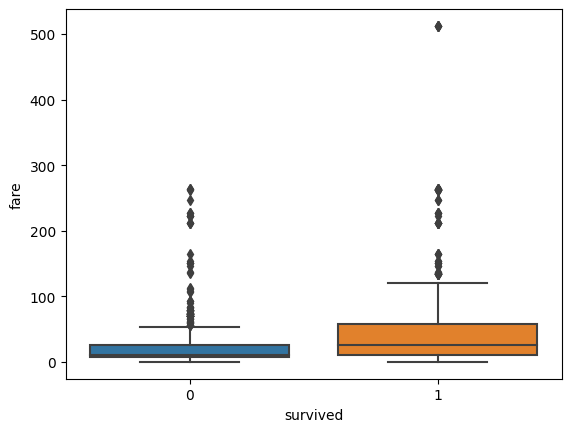

In [7]:
sns.boxplot(x=y,y='fare',data=X)

There seems to be a correlation between the fare payed, and survival chance.

<AxesSubplot: xlabel='survived', ylabel='age'>

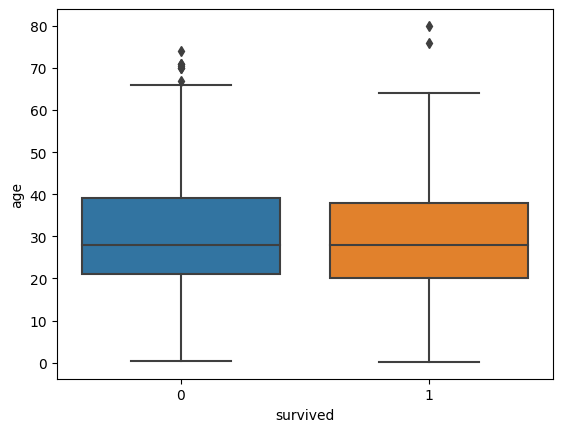

In [8]:
sns.boxplot(x=y,y='age',data=X)

Age does not seem to impact by itself.

/Users/raoulgrouls/Library/Caches/pypoetry/virtualenvs/dme22-EYaUUFkp-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/raoulgrouls/Library/Caches/pypoetry/virtualenvs/dme22-EYaUUFkp-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/raoulgrouls/Library/Caches/pypoetry/virtualenvs/dme22-EYaUUFkp-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/raoulgrouls/Library/Caches/pypoetry/virtualenvs/dme22-EYaUUFkp-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will 

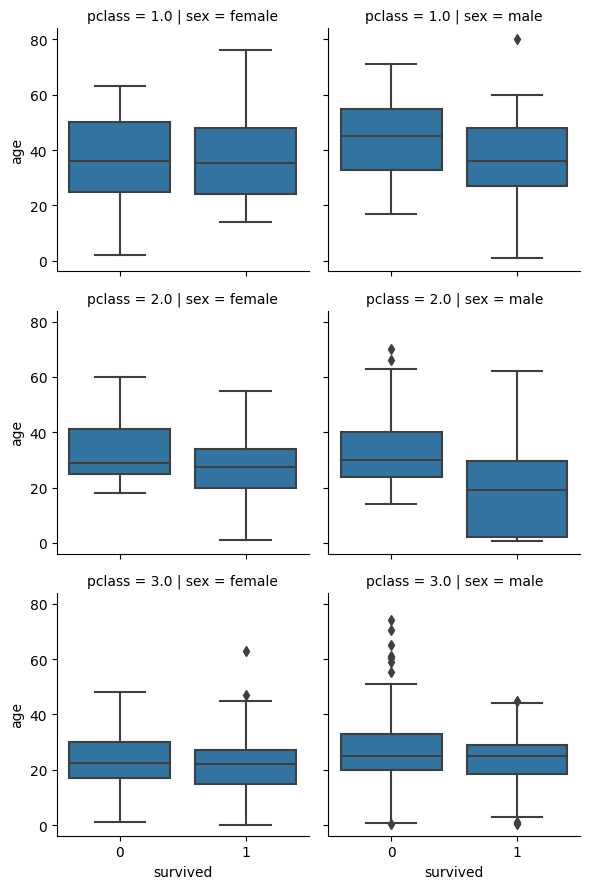

In [9]:
import pandas as pd
p = pd.concat([X, y], axis=1)
g = sns.FacetGrid(p, col="sex",  row="pclass")
g.map(sns.boxplot, "survived", "age")

But in a facet grid, there seems to be a correlation for some groups.

<AxesSubplot: xlabel='pclass', ylabel='age'>

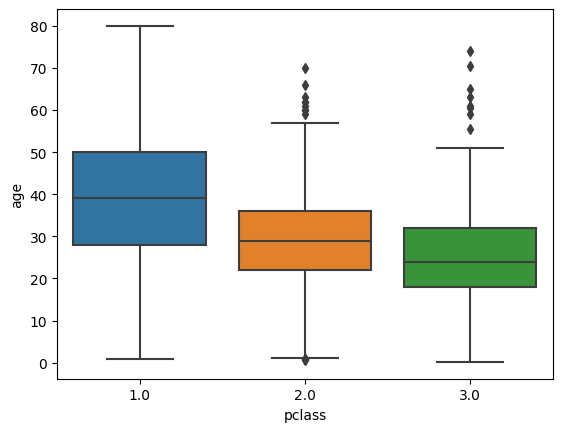

In [10]:
sns.boxplot(x='pclass',y='age',data=X)

But it's hard to tell if that is a causal relationship, or if it's just because of the correlation with other factors.

In [11]:
np.mean(X.isna())

/Users/raoulgrouls/Library/Caches/pypoetry/virtualenvs/dme22-EYaUUFkp-py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


pclass       0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

We have some nan's.

In [12]:
X.drop(["cabin", "ticket", "boat", "body", "home.dest", "name"], axis=1, inplace=True)

Let's drop some variables that are probably not informative. It could still be the case that they correlate with something else. E.g., imagine home destination to be correlated with the location on the deck, which in term could be correlated with survival chances.

A train-test split:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [14]:
np.mean(X_train.isna())

/Users/raoulgrouls/Library/Caches/pypoetry/virtualenvs/dme22-EYaUUFkp-py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


pclass      0.000000
sex         0.000000
age         0.196753
sibsp       0.000000
parch       0.000000
fare        0.000955
embarked    0.001910
dtype: float64

We still have soms nans. Let's use a `SimpleImputer` for that. For the numeric data we use the median.

In [15]:
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

And for the categorical, let's use most frequent.

In [16]:
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[ 
    	('imputer', SimpleImputer(strategy='most_frequent')),
	('ohe', OneHotEncoder(handle_unknown='ignore'))
])

We combine this into a preprocessor.

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [18]:
X_ = preprocessor.fit_transform(X_train)
X_.shape

(1047, 10)

That seems to work as expected!

Let's test a basic logistic regression.

In [19]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.790


A SVC:

In [20]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV, HalvingGridSearchCV
import scipy.stats as stats

param_dist = {'svc__C': stats.expon(scale=10), 'svc__gamma': stats.expon(scale=1)}

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('svc', SVC())])

sh = HalvingRandomSearchCV(clf, param_dist, 
			cv=5,
      factor=2,
      random_state=0)
sh.fit(X_train, y_train)
sh.best_params_

{'svc__C': 11.9610780113337, 'svc__gamma': 0.0621152959253157}

In [21]:
print("model score: %.3f" % sh.score(X_test, y_test))

model score: 0.809


And a RFC:

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rfc', RandomForestClassifier())])
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.813


In [23]:
n_feats = X_train.shape[1]

In [24]:
from scipy.stats import randint

param_dist = {"rfc__max_depth": [3, None],
              "rfc__max_features": randint(1, n_feats+1),
              "rfc__bootstrap": [True, False],
              "rfc__criterion": ["gini", "entropy"]}

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rfc', RandomForestClassifier(n_estimators=20))])

sh = HalvingRandomSearchCV(clf, param_dist, cv=5,
      factor=2,
      random_state=0)
sh.fit(X_train, y_train)
sh.best_params_

{'rfc__bootstrap': True,
 'rfc__criterion': 'gini',
 'rfc__max_depth': 3,
 'rfc__max_features': 6}

In [25]:
print("model score: %.3f" % sh.score(X_test, y_test))

model score: 0.798
